In [1]:
import pandas as pd
import numpy as np
import scipy
import vincent
import string
import operator

In [2]:
from contextlib import contextmanager
from string import capwords
from sklearn.ensemble import RandomForestClassifier 

In [3]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [4]:
crime = pd.read_csv('../train.csv')

In [5]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
import seaborn as sns

In [7]:
def plot_bar(df, title, filename):
    p = (
        'Set2', 'Paired', 'colorblind', 'husl',
        'Set1', 'coolwarm', 'RdYlGn', 'spectral'
    )
    bar = df.plot(kind='barh',
                  title=title,
                  fontsize=8,
                  figsize=(12,8),
                  stacked=False,
                  width=1,
                  colors = sns.color_palette(np.random.choice(p), len(df)),
    )

    bar.figure.savefig(filename)
    
    plt.show()

In [8]:
def plot_top_crimes(df, column, title, fname, items=0):
    df.columns     = df.columns.map(operator.methodcaller('lower'))
    by_col         = df.groupby(column) 
    col_freq       = by_col.size()
    col_freq.index = col_freq.index.map(capwords)

    col_freq.sort(ascending=True, inplace=True)
    plot_bar(col_freq[slice(-1, - items, -1)], title, fname)
 

In [9]:
crime.columns

Index([u'Dates', u'Category', u'Descript', u'DayOfWeek', u'PdDistrict',
       u'Resolution', u'Address', u'X', u'Y'],
      dtype='object')

In [10]:
crime.columns     = crime.columns.map(operator.methodcaller('lower'))

In [11]:
by_col         = crime.groupby('resolution') 


In [12]:
col_freq       = by_col.size()


In [13]:
col_freq

resolution
ARREST, BOOKED                            206403
ARREST, CITED                              77004
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE BOOKED                             5564
JUVENILE CITED                              3332
JUVENILE DIVERTED                            355
LOCATED                                    17101
NONE                                      526790
NOT PROSECUTED                              3714
PROSECUTED BY OUTSIDE AGENCY                2504
PROSECUTED FOR LESSER OFFENSE                 51
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
dtype: int64

In [14]:
if 'NONE' in col_freq.keys():
    print 'NONE'
    del(col_freq['NONE'])

NONE


In [15]:
col_freq



resolution
ARREST, BOOKED                            206403
ARREST, CITED                              77004
CLEARED-CONTACT JUVENILE FOR MORE INFO       217
COMPLAINANT REFUSES TO PROSECUTE            3976
DISTRICT ATTORNEY REFUSES TO PROSECUTE      3934
EXCEPTIONAL CLEARANCE                       1530
JUVENILE ADMONISHED                         1455
JUVENILE BOOKED                             5564
JUVENILE CITED                              3332
JUVENILE DIVERTED                            355
LOCATED                                    17101
NOT PROSECUTED                              3714
PROSECUTED BY OUTSIDE AGENCY                2504
PROSECUTED FOR LESSER OFFENSE                 51
PSYCHOPATHIC CASE                          14534
UNFOUNDED                                   9585
dtype: int64

In [16]:
if 'None' in col_freq.keys():
    print 'None'
    col_freq.drop('None')

In [26]:
col_freq

Arrest, Booked                            206403
Arrest, Cited                              77004
Cleared-contact Juvenile For More Info       217
Complainant Refuses To Prosecute            3976
District Attorney Refuses To Prosecute      3934
Exceptional Clearance                       1530
Juvenile Admonished                         1455
Juvenile Booked                             5564
Juvenile Cited                              3332
Juvenile Diverted                            355
Located                                    17101
Not Prosecuted                              3714
Prosecuted By Outside Agency                2504
Prosecuted For Lesser Offense                 51
Psychopathic Case                          14534
Unfounded                                   9585
dtype: int64

In [27]:
col_freq.index = col_freq.index.map(capwords)

In [28]:
col_freq.index

Index([u'Arrest, Booked', u'Arrest, Cited',
       u'Cleared-contact Juvenile For More Info',
       u'Complainant Refuses To Prosecute',
       u'District Attorney Refuses To Prosecute', u'Exceptional Clearance',
       u'Juvenile Admonished', u'Juvenile Booked', u'Juvenile Cited',
       u'Juvenile Diverted', u'Located', u'Not Prosecuted',
       u'Prosecuted By Outside Agency', u'Prosecuted For Lesser Offense',
       u'Psychopathic Case', u'Unfounded'],
      dtype='object')

In [29]:
def extract_csv(filepath):
    zp  = ZipFile(filepath)
    csv = [f for f in zp.namelist() if os.path.splitext(f)[-1] == '.csv']
    return zp.open(csv.pop())


In [30]:
sns.set_style("whitegrid")
sns.despine()

In [31]:
def input_transformer(filepath):
    with zip_csv_opener(filepath) as fp:
        raw = fp.read().decode('utf-8')
    return pd.read_csv(io.StringIO(raw), parse_dates=True, index_col=0, na_values='NONE')


In [32]:
@contextmanager
def zip_csv_opener(filepath):
    fp = extract_csv(filepath) if is_zipfile(filepath) else open(filepath, 'rb')
    try:
        yield fp
    finally:
        fp.close()

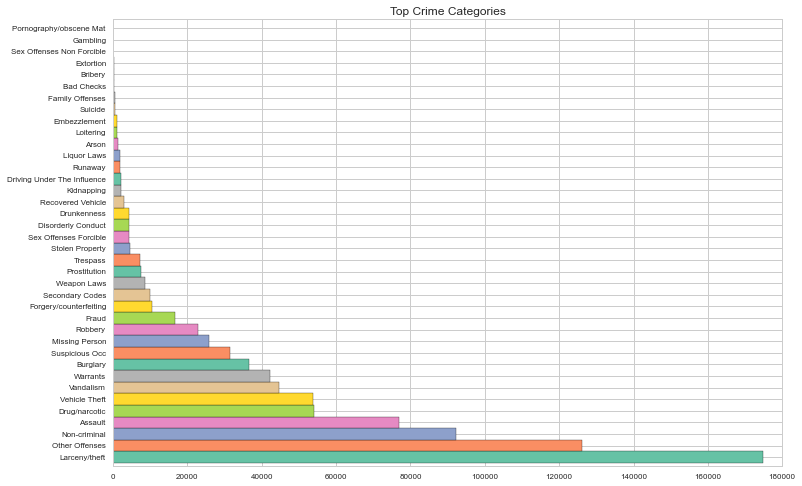

In [33]:
plot_top_crimes(crime, 'category',   'Top Crime Categories',        'category.png')

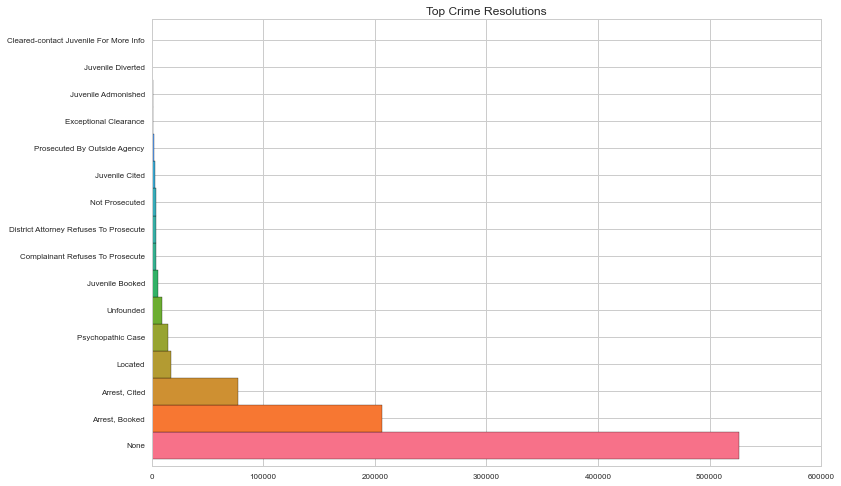

In [34]:
plot_top_crimes(crime, 'resolution', 'Top Crime Resolutions',       'resolution.png')

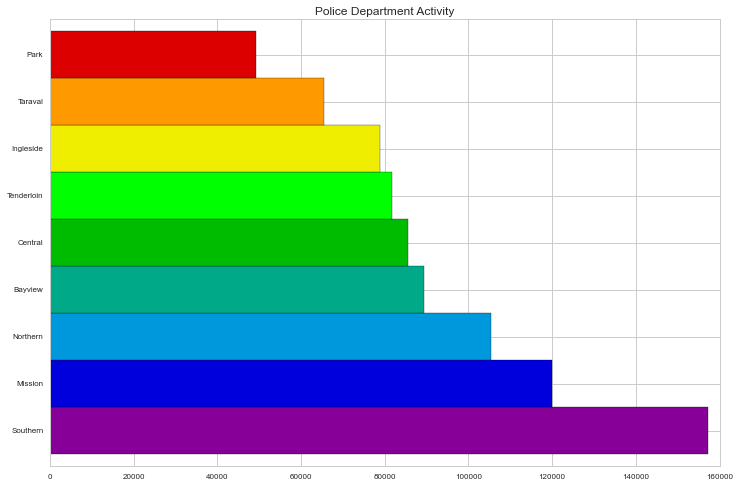

In [35]:
plot_top_crimes(crime, 'pddistrict', 'Police Department Activity',  'police.png')

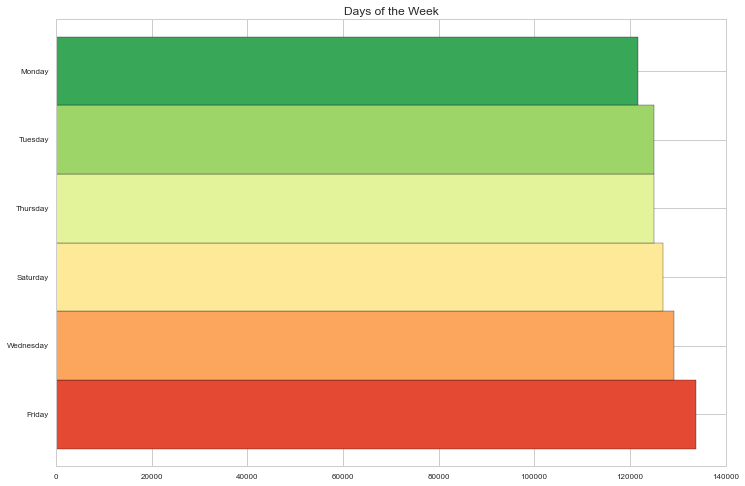

In [36]:
plot_top_crimes(crime, 'dayofweek',  'Days of the Week', 'weekly.png')

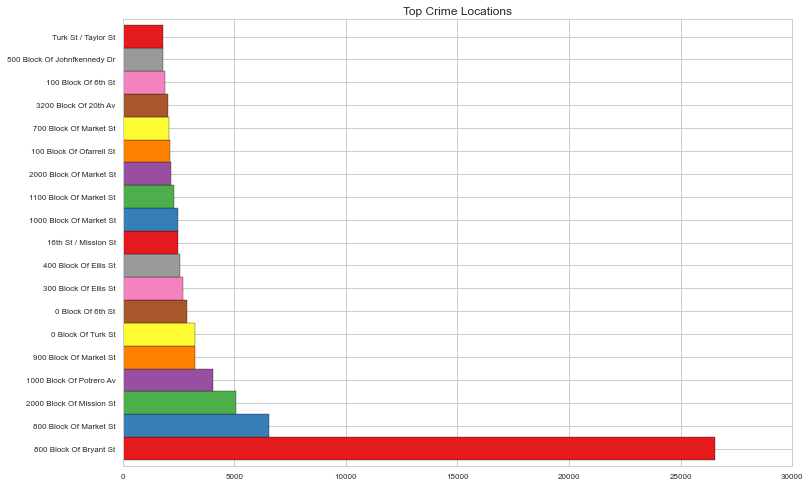

In [37]:
plot_top_crimes(crime, 'address',    'Top Crime Locations',         'location.png', items=20)

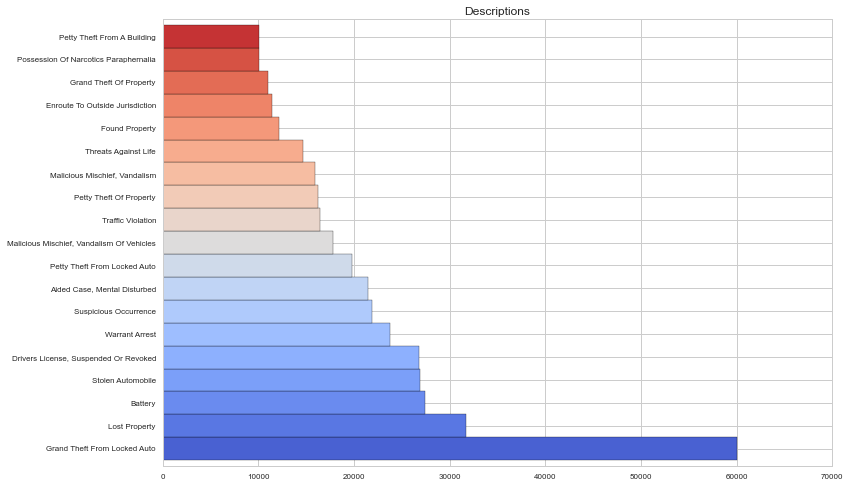

In [38]:
plot_top_crimes(crime, 'descript','Descriptions','descript.png', items=20)

In [39]:
column = 'pddistrict'
crime.columns     = crime.columns.map(operator.methodcaller('lower'))
by_col         = crime.groupby(column) 
col_freq       = by_col.size()
col_freq.index = col_freq.index.map(capwords)

col_freq.sort(ascending=False, inplace=True)

In [40]:
crime.columns

Index([u'dates', u'category', u'descript', u'dayofweek', u'pddistrict',
       u'resolution', u'address', u'x', u'y'],
      dtype='object')

In [41]:
col_freq

Southern      157182
Mission       119908
Northern      105296
Bayview        89431
Central        85460
Tenderloin     81809
Ingleside      78845
Taraval        65596
Park           49313
Richmond       45209
dtype: int64

In [42]:
cff = crime.groupby(['pddistrict','category'])

In [43]:
type(cff.count())

pandas.core.frame.DataFrame

In [44]:
cc = cff.count()

In [45]:
for group in cc:
    print group

dates
descript
dayofweek
resolution
address
x
y


In [46]:
type(cc)

pandas.core.frame.DataFrame

In [47]:
dd = cc.get_values

In [48]:
cc.values

array([[ 393,  393,  393, ...,  393,  393,  393],
       [9857, 9857, 9857, ..., 9857, 9857, 9857],
       [  34,   34,   34, ...,   34,   34,   34],
       ..., 
       [1006, 1006, 1006, ..., 1006, 1006, 1006],
       [7326, 7326, 7326, ..., 7326, 7326, 7326],
       [ 794,  794,  794, ...,  794,  794,  794]])

In [49]:
cc.index[0]

('BAYVIEW', 'ARSON')

In [50]:
cc.index[1]

('BAYVIEW', 'ASSAULT')

In [51]:
cc.address[0]

393

In [52]:
cff.get_group(('BAYVIEW','ARSON')).count().address

393

In [53]:
cc.index.levels[0]

Index([u'BAYVIEW', u'CENTRAL', u'INGLESIDE', u'MISSION', u'NORTHERN', u'PARK',
       u'RICHMOND', u'SOUTHERN', u'TARAVAL', u'TENDERLOIN'],
      dtype='object', name=u'pddistrict')

In [54]:
cc.index.levels[1]

Index([u'ARSON', u'ASSAULT', u'BAD CHECKS', u'BRIBERY', u'BURGLARY',
       u'DISORDERLY CONDUCT', u'DRIVING UNDER THE INFLUENCE', u'DRUG/NARCOTIC',
       u'DRUNKENNESS', u'EMBEZZLEMENT', u'EXTORTION', u'FAMILY OFFENSES',
       u'FORGERY/COUNTERFEITING', u'FRAUD', u'GAMBLING', u'KIDNAPPING',
       u'LARCENY/THEFT', u'LIQUOR LAWS', u'LOITERING', u'MISSING PERSON',
       u'NON-CRIMINAL', u'OTHER OFFENSES', u'PORNOGRAPHY/OBSCENE MAT',
       u'PROSTITUTION', u'RECOVERED VEHICLE', u'ROBBERY', u'RUNAWAY',
       u'SECONDARY CODES', u'SEX OFFENSES FORCIBLE',
       u'SEX OFFENSES NON FORCIBLE', u'STOLEN PROPERTY', u'SUICIDE',
       u'SUSPICIOUS OCC', u'TREA', u'TRESPASS', u'VANDALISM', u'VEHICLE THEFT',
       u'WARRANTS', u'WEAPON LAWS'],
      dtype='object', name=u'category')

In [55]:
from collections import defaultdict
cnt=0
neib_cat={}
for nn in cc.index.levels[0]:
    neib_cat[nn]=defaultdict()

In [56]:
neib_cat

{'BAYVIEW': defaultdict(None, {}),
 'CENTRAL': defaultdict(None, {}),
 'INGLESIDE': defaultdict(None, {}),
 'MISSION': defaultdict(None, {}),
 'NORTHERN': defaultdict(None, {}),
 'PARK': defaultdict(None, {}),
 'RICHMOND': defaultdict(None, {}),
 'SOUTHERN': defaultdict(None, {}),
 'TARAVAL': defaultdict(None, {}),
 'TENDERLOIN': defaultdict(None, {})}

In [57]:
cnt = 0
d_now = defaultdict()
neib_cat={}
for nn,vv in zip(cc.index,cc.address.values):
    if (nn[0] == cc.index.levels[0][cnt]):
        neib = nn[0]
        
        d_now[nn[1]] = vv
    neib_cat[nn[0]] = d_now
    if (nn[0] != cc.index.levels[0][cnt]):
        cnt += 1
        d_now = defaultdict()
    

In [58]:
neib_cat['BAYVIEW']

defaultdict(None, {'KIDNAPPING': 313, 'WEAPON LAWS': 1647, 'SECONDARY CODES': 1662, 'WARRANTS': 4322, 'LOITERING': 50, 'EMBEZZLEMENT': 100, 'SUICIDE': 37, 'DRIVING UNDER THE INFLUENCE': 179, 'VEHICLE THEFT': 7219, 'ROBBERY': 2715, 'BURGLARY': 3930, 'STOLEN PROPERTY': 397, 'PORNOGRAPHY/OBSCENE MAT': 2, 'SUSPICIOUS OCC': 3906, 'ARSON': 393, 'BRIBERY': 56, 'FORGERY/COUNTERFEITING': 774, 'BAD CHECKS': 34, 'DRUNKENNESS': 243, 'GAMBLING': 29, 'OTHER OFFENSES': 17053, 'RECOVERED VEHICLE': 735, 'FRAUD': 866, 'FAMILY OFFENSES': 73, 'DRUG/NARCOTIC': 4498, 'SEX OFFENSES NON FORCIBLE': 22, 'LARCENY/THEFT': 10119, 'VANDALISM': 5356, 'MISSING PERSON': 5038, 'LIQUOR LAWS': 114, 'TRESPASS': 636, 'TREA': 3, 'SEX OFFENSES FORCIBLE': 387, 'EXTORTION': 13, 'ASSAULT': 9857, 'RUNAWAY': 265, 'NON-CRIMINAL': 6099, 'DISORDERLY CONDUCT': 219, 'PROSTITUTION': 70})

In [86]:
df = pd.DataFrame(neib_cat)
df

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
ARSON,393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASSAULT,9857,6977,8533,11149,8318,3515,3202,12183,5463,7679
BAD CHECKS,34,65,32,46,54,15,31,74,36,19
BRIBERY,56,12,53,66,18,7,8,37,17,15
BURGLARY,3930,4519,3331,3745,5854,2888,2696,4841,3463,1488
DISORDERLY CONDUCT,219,494,171,1099,452,271,108,511,162,833
DRIVING UNDER THE INFLUENCE,179,160,206,357,260,176,319,306,202,103
DRUG/NARCOTIC,4498,1805,2373,8757,4511,2573,999,9228,1531,17696
DRUNKENNESS,243,517,190,782,368,374,149,959,259,439
EMBEZZLEMENT,100,180,78,124,131,50,43,275,94,91


In [81]:
df.index[0]

'ARSON'

In [85]:
df.iloc[1].sum()

76876.0

In [64]:
vincent.core.initialize_notebook()
group = vincent.GroupedBar(df)
#group.legend(title='Categories')
#group.colors(brew='Spectral')
#group.width=750
group.display()

In [ ]:
len(cc.index.levels[0])*len(cc.index.levels[1])

In [88]:
dates = pd.DatetimeIndex(crime.dates)
hour = dates[0].hour
crime['hour'] = hour

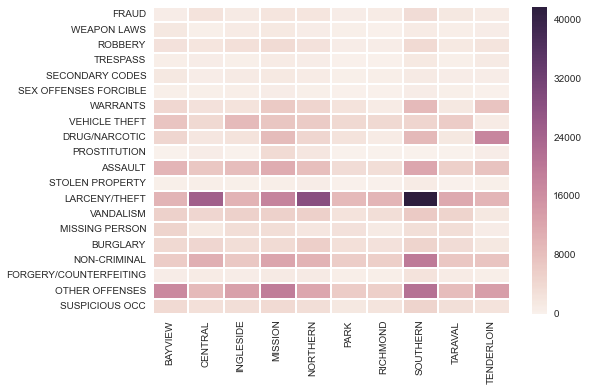

In [138]:
sns.heatmap(df.ix[ind],  linewidths=.5)

In [102]:
#What are the top 20 crimes in the city
n = len(df.index)
d_cat = {}
for i in xrange(n):
    d_cat[df.index[i]]=df.iloc[i].sum()
#d_cat = sorted(d_cat.items(), key=operator.itemgetter(1),reverse=True)

In [106]:
d_cat_sorted = {}
for a, b in sorted(d_cat.iteritems(), key=lambda item: item[1], reverse=True)[:20]:
    d_cat_sorted[a]=b

In [107]:
d_cat_sorted

{'ASSAULT': 76876.0,
 'BURGLARY': 36755.0,
 'DRUG/NARCOTIC': 53971.0,
 'FORGERY/COUNTERFEITING': 10609.0,
 'FRAUD': 16679.0,
 'LARCENY/THEFT': 174900.0,
 'MISSING PERSON': 25989.0,
 'NON-CRIMINAL': 92304.0,
 'OTHER OFFENSES': 126182.0,
 'PROSTITUTION': 7484.0,
 'ROBBERY': 23000.0,
 'SECONDARY CODES': 9985.0,
 'SEX OFFENSES FORCIBLE': 4388.0,
 'STOLEN PROPERTY': 4540.0,
 'SUSPICIOUS OCC': 31414.0,
 'TRESPASS': 7326.0,
 'VANDALISM': 44725.0,
 'VEHICLE THEFT': 53781.0,
 'WARRANTS': 42214.0,
 'WEAPON LAWS': 8555.0}

Which crimes effect you the most? Find neighborhoods that you should avoid for these crimes.

In [112]:
df_keys = df.index.tolist

In [113]:
df_keys.index('WEAPON LAWS')

AttributeError: 'function' object has no attribute 'index'

In [115]:
indexes = [i for i,x in enumerate(df.index) if x == 'WEAPON LAWS']

In [135]:
ind = map(lambda y: [i for i,x in enumerate(df.index)if x == y][0],d_cat_sorted.keys())

In [136]:
ind

[13, 38, 25, 34, 27, 28, 37, 36, 7, 23, 1, 30, 16, 35, 19, 4, 20, 12, 21, 32]

In [137]:
df.ix[ind]

,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
FRAUD,866,2344,1213,1970,2055,974,1137,3441,1549,1130
WEAPON LAWS,1647,487,1130,1329,789,357,327,1128,567,794
ROBBERY,2715,1999,2788,3629,2640,957,787,3878,1405,2202
TRESPASS,636,904,416,1021,780,290,245,1456,386,1192
SECONDARY CODES,1662,704,1300,1439,999,444,525,1205,983,724
SEX OFFENSES FORCIBLE,387,394,504,718,435,212,216,819,383,320
WARRANTS,4322,2777,2528,6615,4599,2318,1010,9102,1617,7326
VEHICLE THEFT,7219,4210,8960,7148,6291,3963,4117,4725,6142,1006
DRUG/NARCOTIC,4498,1805,2373,8757,4511,2573,999,9228,1531,17696
PROSTITUTION,70,778,26,3629,1831,5,24,135,82,904


In [140]:
crime.corr()

,x,y,hour
x,1.000000,0.559338,NaN
y,0.559338,1.000000,NaN
hour,NaN,NaN,NaN


,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
BAYVIEW,1.000000,0.654143,0.961285,0.913386,0.712414,0.837839,0.775836,0.729637,0.860480,0.667421
CENTRAL,0.654143,1.000000,0.737686,0.825231,0.988290,0.918572,0.954436,0.971119,0.904247,0.487000
INGLESIDE,0.961285,0.737686,1.000000,0.903891,0.775423,0.886120,0.869738,0.763012,0.933480,0.555812
MISSION,0.913386,0.825231,0.903891,1.000000,0.866516,0.924248,0.870959,0.901857,0.891282,0.791435
NORTHERN,0.712414,0.988290,0.775423,0.866516,1.000000,0.933900,0.951814,0.976733,0.913772,0.559830
PARK,0.837839,0.918572,0.886120,0.924248,0.933900,1.000000,0.968054,0.935342,0.971035,0.624301
RICHMOND,0.775836,0.954436,0.869738,0.870959,0.951814,0.968054,1.000000,0.928519,0.980952,0.488897
SOUTHERN,0.729637,0.971119,0.763012,0.901857,0.976733,0.935342,0.928519,1.000000,0.890625,0.657937
TARAVAL,0.860480,0.904247,0.933480,0.891282,0.913772,0.971035,0.980952,0.890625,1.000000,0.499616
TENDERLOIN,0.667421,0.487000,0.555812,0.791435,0.559830,0.624301,0.488897,0.657937,0.499616,1.000000


In [143]:
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

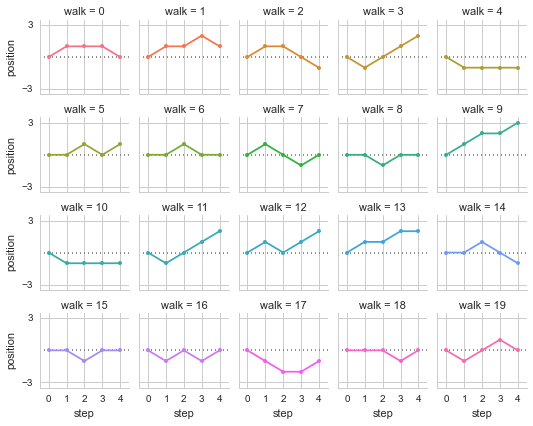

In [144]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", col_wrap=5, size=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o", ms=4)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

In [145]:
df

,position,step,walk
0,0,0,0
1,1,1,0
2,1,2,0
3,1,3,0
4,0,4,0
5,0,0,1
6,1,1,1
7,1,2,1
8,2,3,1
9,1,4,1
